In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df_new=pd.read_excel('Gym_cleaned_final.xlsx')

In [3]:
df_new.shape

(14589, 15)

In [4]:
pd.set_option('display.max_columns',None)


In [5]:
df_new.head()

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,28,Male,18,1.68,85.0,Yes,Yes,30.12,Obuse,Weight Loss,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,...",Follow a regular exercise schedule. Adhere to ...
1,32,Male,18,1.68,85.0,Yes,Yes,30.12,Obuse,Weight Loss,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,...",Follow a regular exercise schedule. Adhere to ...
2,60,Male,19,1.72,90.0,Yes,Yes,30.42,Obuse,Weight Loss,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,...",Follow a regular exercise schedule. Adhere to ...
3,64,Male,19,1.72,90.0,Yes,Yes,30.42,Obuse,Weight Loss,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,...",Follow a regular exercise schedule. Adhere to ...
4,92,Male,20,1.61,91.0,Yes,Yes,35.11,Obuse,Weight Loss,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,...",Follow a regular exercise schedule. Adhere to ...


In [6]:
df_new.columns

Index(['ID', 'Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes',
       'BMI', 'Level', 'Fitness Goal', 'Fitness Type', 'Exercises',
       'Equipment', 'Diet', 'Recommendation'],
      dtype='object')

In [7]:

df = df_new.drop_duplicates()
df.shape



(14589, 15)

In [8]:
df['Level'].unique()

array(['Obuse', 'Overweight', 'Normal', 'Underweight'], dtype=object)

In [9]:
df.isna().sum()

ID                0
Sex               0
Age               0
Height            0
Weight            0
Hypertension      0
Diabetes          0
BMI               0
Level             0
Fitness Goal      0
Fitness Type      0
Exercises         0
Equipment         0
Diet              0
Recommendation    0
dtype: int64

In [10]:

df.drop(['ID','Recommendation'],axis='columns',inplace=True)

In [11]:
df['Level']=df['Level'].map({'Underweight':-1,'Normal':0,'Overweight':1,'Obuse':2})

In [12]:
df['Fitness Goal']=df['Fitness Goal'].map({'Weight Gain':1,'Weight Loss':0})

In [13]:
df['Exercises'].unique()

array(['brisk walking,cycling,swimming,dancing',
       'Squats,deadlifts,bench presses,overhead presses',
       'Brisk walking,cycling,swimming,running ,dancing',
       'Squats,yoga,deadlifts,bench presses,overhead presses',
       'Walking,Yoga,Swimming'], dtype=object)

In [14]:
df['Equipment'].unique()

array(['Kettlebell,Dumbbells,Yoga Mat,Treadmill',
       'Ellipticals,Indoor Rowers,Treadmills,Rowing machine',
       'Kettlebell,Dumbbells,Yoga Mat',
       'Ellipticals,Indoor Rowers,Treadmills Rowing machine',
       'Lightthletic shoes,resistance bands,light dumbbells,Blood glucose monitor',
       'Dumbbells,barbells,Blood glucose monitor',
       'Lightthletic shoes,resistance bands light dumbbells',
       'Dumbbells,barbells', 'Equipment Required'], dtype=object)

In [15]:
df['Diet'].unique()

array([' Garlic,Mushroom,Green Papper,Icebetg Lettuce, Baru Nuts,Beech Nuts,Hemp Seeds,Cheese Spandwich, Apple Juice,Mango juice,and Beetroot juice',
       ' Broccoli,Carrots,Spinach,Lettuce,Onion, Cheese,Cattoge cheese,Skim Milk,Law fat Milk,Baru Nuts, Fruit Juice,Aloe vera juice,Cold-pressed juice,Watermelon juice',
       ' Garlic,Roma Tomatoes,Capers,Green Papper,Iceberg Lettuce, Cheese Sandwich,Baru Nuts,Beech Nuts,Squash Seeds,Mixed Teff,peanut butter,jelly sandwich, Apple juice,beetroot juice,mango juice',
       ' Garlic,mushroon,green papper, Baru Nuts,Beech Nuts,Hemp Seeds, Apple juice,Mango,Beetroot Juice',
       ' Garlic,mushroon,green papper,water chestnut, Baru Nuts,Beech Nuts,black walnut, Apple juice,Mango,Beetroot Juice',
       ' Mixed greens,cherry tomatoes,cucumbers,bell peppers,carrots,celery,bell peppers,Chicken,fish,tofu,legumes, Green juice,kale,spinach,cucumber,celery,apple',
       ' Garlic,Roma Tomatoes,Capers,Iceberg Lettuce, Cheese Standwish,Baru Nuts,Bee

In [16]:
df.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet
0,Male,18,1.68,85.0,Yes,Yes,30.12,2,0,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,..."
1,Male,18,1.68,85.0,Yes,Yes,30.12,2,0,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,..."
2,Male,19,1.72,90.0,Yes,Yes,30.42,2,0,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,..."
3,Male,19,1.72,90.0,Yes,Yes,30.42,2,0,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,..."
4,Male,20,1.61,91.0,Yes,Yes,35.11,2,0,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,..."


Text(0.5, 1.0, 'Gender Distribution')

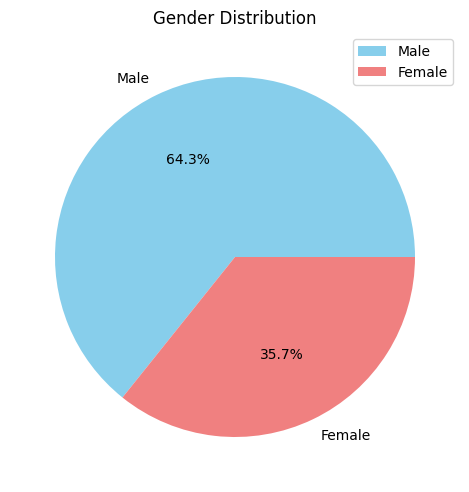

In [17]:
gender_count=df['Sex'].value_counts()
gender_labels=['Male','Female']
plt.Figure(figsize=(8,5))
plt.pie(gender_count,labels=gender_labels,autopct='%1.1f%%',colors=['skyblue','lightcoral'])
plt.legend()
plt.tight_layout()
plt.title("Gender Distribution")

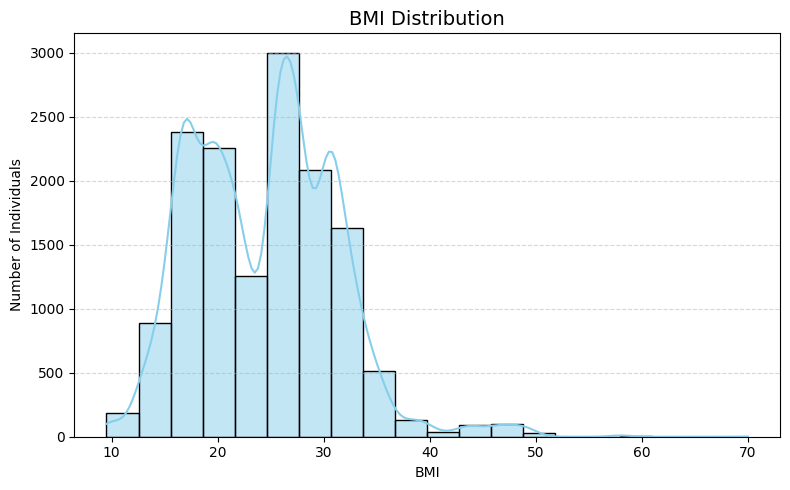

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='BMI', bins=20, kde=True, color='skyblue')

plt.title("BMI Distribution", fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Number of Individuals")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<Axes: xlabel='Height', ylabel='Weight'>

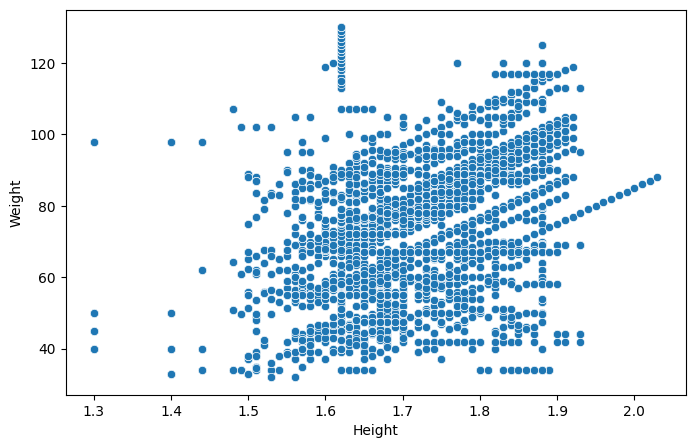

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Height",y="Weight",data=df)


In [20]:
df

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet
0,Male,18,1.68,85.0,Yes,Yes,30.12,2,0,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,..."
1,Male,18,1.68,85.0,Yes,Yes,30.12,2,0,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,..."
2,Male,19,1.72,90.0,Yes,Yes,30.42,2,0,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,..."
3,Male,19,1.72,90.0,Yes,Yes,30.42,2,0,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,..."
4,Male,20,1.61,91.0,Yes,Yes,35.11,2,0,Cardio Fitness,"brisk walking,cycling,swimming,dancing","Kettlebell,Dumbbells,Yoga Mat,Treadmill","Garlic,Mushroom,Green Papper,Icebetg Lettuce,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14584,Male,20,1.60,55.0,No,No,21.48,0,1,Muscular Fitness,"Squats,deadlifts,bench presses,overhead presses","Dumbbells,barbells","Mixed greens,cherry tomatoes,cucumbers,bell p..."
14585,Male,18,1.60,55.0,No,No,21.48,0,1,Muscular Fitness,"Squats,deadlifts,bench presses,overhead presses","Dumbbells,barbells","Mixed greens,cherry tomatoes,cucumbers,bell p..."
14586,Male,22,1.63,55.0,No,No,20.70,0,1,Muscular Fitness,"Squats,deadlifts,bench presses,overhead presses","Dumbbells,barbells","Mixed greens,cherry tomatoes,cucumbers,bell p..."
14587,Male,50,1.72,55.0,No,No,18.59,0,1,Muscular Fitness,"Squats,deadlifts,bench presses,overhead presses","Dumbbells,barbells","Mixed greens,cherry tomatoes,cucumbers,bell p..."


In [21]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_htn = LabelEncoder()
le_db = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Hypertension'] = le_htn.fit_transform(df['Hypertension'])
df['Diabetes'] = le_db.fit_transform(df['Diabetes'])


df1 = pd.get_dummies(df[['Fitness Type']],dtype=int)


In [22]:
df1

,Fitness Type_Cardio Fitness,Fitness Type_Muscular Fitness
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14584,0,1
14585,0,1
14586,0,1
14587,0,1


In [23]:
# from sklearn.preprocessing import MultiLabelBinarizer

# def encode_multilabel_column(df, column):
#     mlb = MultiLabelBinarizer()
#     transformed = mlb.fit_transform(df[column].str.split(','))  
#     return pd.DataFrame(transformed, columns=mlb.classes_)


# df_exercises = encode_multilabel_column(df, 'Exercises')
# df_equipment = encode_multilabel_column(df, 'Equipment')
# df_diet = encode_multilabel_column(df, 'Diet')
# # df_fitness_type= encode_multilabel_column(df,'Fitness Type')


# df = df.drop(columns=['Exercises', 'Equipment', 'Diet'])
# df = pd.concat([df, df_exercises, df_equipment, df_diet], axis=1)

In [24]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb_exercises = MultiLabelBinarizer()
mlb_equipment = MultiLabelBinarizer()
mlb_diet = MultiLabelBinarizer()

df_exercises = pd.DataFrame(
    mlb_exercises.fit_transform(df['Exercises'].str.split(',')),
    columns=mlb_exercises.classes_
)

df_equipment = pd.DataFrame(
    mlb_equipment.fit_transform(df['Equipment'].str.split(',')),
    columns=mlb_equipment.classes_
)

df_diet = pd.DataFrame(
    mlb_diet.fit_transform(df['Diet'].str.split(',')),
    columns=mlb_diet.classes_
)

# Drop original 
df = df.drop(columns=['Exercises', 'Equipment', 'Diet'])

# Merge transformed columns into original dataframe
df = pd.concat([df, df_exercises, df_equipment, df_diet], axis=1)


In [25]:
df.drop('Fitness Type',inplace=True,axis='columns')

In [26]:
df=pd.concat([df,df1],axis='columns')

In [27]:
df.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Brisk walking,Squats,Swimming,Walking,Yoga,bench presses,brisk walking,cycling,dancing,deadlifts,overhead presses,running,swimming,yoga,Blood glucose monitor,Dumbbells,Ellipticals,Equipment Required,Indoor Rowers,Kettlebell,Lightthletic shoes,Rowing machine,Treadmill,Treadmills,Treadmills Rowing machine,Yoga Mat,barbells,light dumbbells,resistance bands,resistance bands light dumbbells,Apple Juice,Apple juice,Baru Nuts,Broccoli,Carrots,Cheese,Cheese Sandwich,Cheese Standwish,Fruit Juice,Fruit juice,Garlic,Green juice,Mixed greens,Red meats,Tomatoes,poultry,Aloe vera juice,Baru Nuts,Beech Nuts,Beetroot Juice,Capers,Carrots,Cattoge cheese,Cheese Spandwich,Chicken,Cold-pressed juice,Diet,Garlic,Green Papper,Hemp Seeds,Iceberg Lettuce,Icebetg Lettuce,Law fat Milk,Lettuce,Mango,Mango juice,Mixed Teff,Mushroom,Onion,Roma Tomatoes,Skim Milk,Spinach,Squash Seeds,Sweet Potato,Watermelon juice,and Beetroot juice,apple,apple juice,beetroot juice,bell peppers,black walnut,broccoli,carrot juice,carrots,celery,cherry tomatoes,cucumber,cucumbers,dairy products,eggs,fish,green papper,jelly sandwich,kale,leafy greens,legumes,low-fat dairy products,mango juice,mushroon,nuts,peanut butter,poultry,spinach,tofu,water chestnut,watermelon juice,Fitness Type_Cardio Fitness,Fitness Type_Muscular Fitness
0,1,18,1.68,85.0,1,1,30.12,2,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,18,1.68,85.0,1,1,30.12,2,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,19,1.72,90.0,1,1,30.42,2,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,19,1.72,90.0,1,1,30.42,2,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,20,1.61,91.0,1,1,35.11,2,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
df.shape

(14589, 117)

In [29]:
x = df.iloc[:,:9]

y = df.iloc[:,9:]


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,shuffle=True)


In [31]:
# print("Total duplicates in dataset:", x.duplicated().sum())

In [32]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0.2, random_state=42, shuffle=True
# )


In [33]:
# import numpy as np

# overlap = np.any([np.array_equal(row, x_row) for row in x_test for x_row in x_train])
# print("Any overlapping rows between train and test:", overlap)


In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
multi_output_clf = MultiOutputClassifier(base_model)
multi_output_clf.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [ ]:
from xgboost import XGBClassifier
from sklearn.multioutput import ClassifierChain # multioutput classifier

base_model = XGBClassifier(objective="binary:logistic", eval_metric="logloss", use_label_encoder=False,random_state=42,
    n_jobs=-1)

multi_output_clf = ClassifierChain(base_model)

multi_output_clf.fit(x_train, y_train)
   

C:\Users\Pranav P\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:50:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Pranav P\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:50:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Pranav P\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:50:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Pranav P\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:50:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\

ClassifierChain(base_estimator=XGBClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric='logloss',
                                             feature_types=None,
                                             feature_weights=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=-1,
                                             num_parallel_tree=None, ...))

In [59]:
y_train

,Brisk walking,Squats,Swimming,Walking,Yoga,bench presses,brisk walking,cycling,dancing,deadlifts,overhead presses,running,swimming,yoga,Blood glucose monitor,Dumbbells,Ellipticals,Equipment Required,Indoor Rowers,Kettlebell,Lightthletic shoes,Rowing machine,Treadmill,Treadmills,Treadmills Rowing machine,Yoga Mat,barbells,light dumbbells,resistance bands,resistance bands light dumbbells,Apple Juice,Apple juice,Baru Nuts,Broccoli,Carrots,Cheese,Cheese Sandwich,Cheese Standwish,Fruit Juice,Fruit juice,Garlic,Green juice,Mixed greens,Red meats,Tomatoes,poultry,Aloe vera juice,Baru Nuts,Beech Nuts,Beetroot Juice,Capers,Carrots,Cattoge cheese,Cheese Spandwich,Chicken,Cold-pressed juice,Diet,Garlic,Green Papper,Hemp Seeds,Iceberg Lettuce,Icebetg Lettuce,Law fat Milk,Lettuce,Mango,Mango juice,Mixed Teff,Mushroom,Onion,Roma Tomatoes,Skim Milk,Spinach,Squash Seeds,Sweet Potato,Watermelon juice,and Beetroot juice,apple,apple juice,beetroot juice,bell peppers,black walnut,broccoli,carrot juice,carrots,celery,cherry tomatoes,cucumber,cucumbers,dairy products,eggs,fish,green papper,jelly sandwich,kale,leafy greens,legumes,low-fat dairy products,mango juice,mushroon,nuts,peanut butter,poultry,spinach,tofu,water chestnut,watermelon juice,Fitness Type_Cardio Fitness,Fitness Type_Muscular Fitness
13082,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1
5502,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1570,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9159,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
9581,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13418,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1
5390,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
860,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [60]:
y_pred=multi_output_clf.predict(x_test)
y_pred

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [61]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.9581905414667581

In [62]:
from sklearn.metrics import hamming_loss, f1_score
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='samples'))


Hamming Loss: 0.006926992105196355
F1 Score: 0.9823279688422405


In [63]:
print(x_train.shape)


(11671, 9)


In [ ]:
# # Step 1: Get feature importances from one of the output classifiers
# feature_importances = multi_output_clf.estimators_[0].feature_importances_

# # Step 2: Define the feature names (make sure it matches x_train order)
# feature_names = ['Age', 'Sex', 'Height', 'Weight', 'BMI', 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal']

# # Step 3: Create DataFrame for visualization
# importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# # Step 4: Print or visualize
# print(importance_df)


        Feature  Importance
5  Hypertension    0.569816
7         Level    0.153811
8  Fitness Goal    0.121915
6      Diabetes    0.103174
3        Weight    0.041115
2        Height    0.003026
4           BMI    0.002805
0           Age    0.002263
1           Sex    0.002074


In [64]:
def predict_fitness_plan(sample_input):
    sample_input_df = pd.DataFrame([sample_input], columns=x.columns)

    sample_input_scaled = scaler.transform(sample_input_df)

    predicted_output = multi_output_clf.predict(sample_input_scaled)

    columns = y.columns 
    predicted_labels = [columns[i] for i, val in enumerate(predicted_output[0]) if val == 1]

    return predicted_labels
#sample_input = [1, 42, 1.64, 83, 0, 0, 30.86, 2, 0] 
sample_input=[1, 25, 1.75, 70, 0, 0, 22.9, 0, 1]
# 
predict=predict_fitness_plan(sample_input)

In [65]:
print(predict)

['Squats', 'bench presses', 'deadlifts', 'overhead presses', 'Dumbbells', 'barbells', ' Green juice', ' Mixed greens', 'Chicken', 'apple', 'bell peppers', 'carrots', 'celery', 'cherry tomatoes', 'cucumber', 'cucumbers', 'fish', 'kale', 'legumes', 'spinach', 'tofu', 'Fitness Type_Muscular Fitness']


In [45]:
# for i in predict:
#     print(i)

In [46]:
exe=['squats','deadlifts','bench presses','overhead presses','yoga','brisk walking','cycling', 
    'swimming','running','dancing','walking','yoga','swimming','brisk walking']
exe_lst=[]
for item in predict:
    split_items = item.split(',')
    for elem in split_items:
        elem = elem.strip().lower()
        if elem in exe:
            exe_lst.append(elem)

print(exe_lst)

['squats', 'bench presses', 'deadlifts', 'overhead presses']


In [47]:
equ=['dumbbells','barbells','lightthletic shoes','resistance bands','light dumbbells',
     'blood glucose monitor','ellipticals','indoor rowers','treadmills','rowing machine',
     'kettlebell','yoga mat','treadmill']
equ_lst=[]
for i in predict:
    split_items = i.split(',')
    for j in split_items:
        j = j.strip().lower()  
        if j in equ:
            equ_lst.append(j)
print(equ_lst)

['dumbbells', 'barbells']


In [48]:
veg=["broccoli","bell peppers","capers","carrots","celery","cherry tomatoes","cucumbers","garlic","green papper",
    "iceberg lettuce","icebetg lettuce","leafy greens","lettuce","mixed greens","mushroom","onion","roma tomatoes",
    "spinach","sweet potato","tomatoes","water chestnut"]
veggies=[]
for i in predict:
    split_items=i.split(',')
    for j in split_items:
        j=j.strip().lower()
        if j in veg:
            veggies.append(j)
print(veggies)

['mixed greens', 'bell peppers', 'carrots', 'celery', 'cherry tomatoes', 'cucumbers', 'spinach']


In [49]:
protein=["red meats","poultry","fish","eggs","dairy products","legumes","nuts","tofu","low-fat dairy products", 
    "cheese standwish","baru nuts","beech nuts","squash seeds","mixed teff","cheese sandwich","peanut butter", 
    "jelly sandwich","black walnut","hemp seeds","cheese","cattoge cheese","skim milk","law fat milk","chicken"]
protein_lst=[]
for i in predict:
    split_items=i.split(',')
    for j in split_items:
        j=j.strip().lower()
        if j in protein:
            protein_lst.append(j)
print(protein_lst)

['chicken', 'fish', 'legumes', 'tofu']


In [50]:
juices=["fruit juice","watermelon juice","carrot juice","apple juice","mango juice","beetroot juice","green juice",
    "kale","spinach","cucumber","celery","aloe vera juice","cold-pressed juice"]
juice_lst=[]
for i in predict:
    split_items=i.split(',')
    for j in split_items:
        j=j.strip().lower()
        if j in juices:
            juice_lst.append(j)
print(juice_lst)

['green juice', 'celery', 'cucumber', 'kale', 'spinach']


In [51]:
fitness_type=['Fitness Type_Muscular Fitness','Fitness Type_Cardio Fitness']
for i in predict:
    if i.strip() in fitness_type:
        fitness=i
        break
print(fitness)


Fitness Type_Muscular Fitness


In [52]:
print(f"✅Excercise : {",".join(exe_lst)}")
print(f"✅Equipment to use :{",".join(equ_lst)}")
print(f"✅Veggies to add :{",".join(veggies)}")
print(f"✅Protein Source to add :{",".join(protein_lst)}")
print(f"✅Juices To Drink :{",".join(juice_lst)}")
print(f"✅Fitness Type : {fitness.split('_')[1]}")

✅Excercise : squats,bench presses,deadlifts,overhead presses
✅Equipment to use :dumbbells,barbells
✅Veggies to add :mixed greens,bell peppers,carrots,celery,cherry tomatoes,cucumbers,spinach
✅Protein Source to add :chicken,fish,legumes,tofu
✅Juices To Drink :green juice,celery,cucumber,kale,spinach
✅Fitness Type : Muscular Fitness


In [66]:
train_acc = multi_output_clf.score(x_train, y_train)
test_acc = multi_output_clf.score(x_test, y_test)
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")

Training Accuracy : 0.9947
Testing Accuracy : 0.9582


In [67]:
len(y.columns)

108

In [55]:
len(predict)

22

In [68]:
import pickle

# Save your model
with open("model.pkl", "wb") as f:
    pickle.dump(multi_output_clf, f)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save LabelEncoders separately
with open("le_sex.pkl", "wb") as f:
    pickle.dump(le_sex, f)

with open("le_htn.pkl", "wb") as f:
    pickle.dump(le_htn, f)

with open("le_db.pkl", "wb") as f:
    pickle.dump(le_db, f)

# Save MultiLabelBinarizers
with open("mlb_exercises.pkl", "wb") as f:
    pickle.dump(mlb_exercises, f)

with open("mlb_equipment.pkl", "wb") as f:
    pickle.dump(mlb_equipment, f)

with open("mlb_diet.pkl", "wb") as f:
    pickle.dump(mlb_diet, f)

# Save Fitness Type column names (from df1)
with open("fitness_type_columns.pkl", "wb") as f:
    pickle.dump(df1.columns.tolist(), f)


In [ ]:
df()